In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
plt.rcParams['text.usetex'] = True

In [15]:
file_path = os.path.expanduser("~/Dropbox/03_Yechan3/연구/서연이랑/GODE/dists.npy")
dists = np.load(file_path)
df = pd.read_csv("~/Dropbox/03_Yechan3/연구/서연이랑/GODE/ex2_kappa_results.csv")

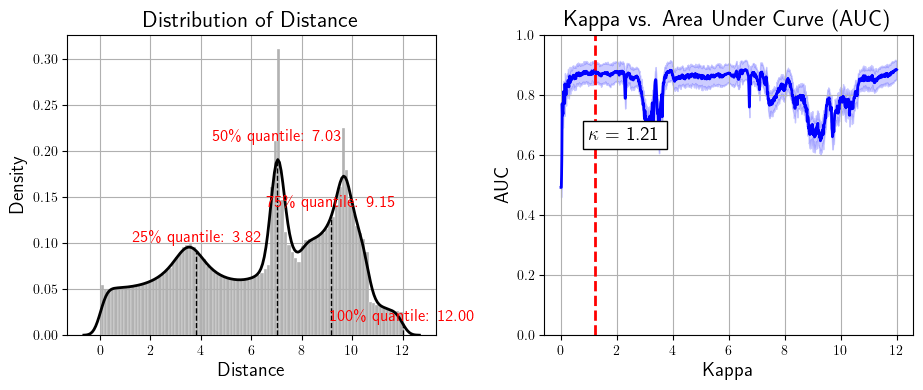

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'dists' contains the distribution data used in the first plot
# Assuming 'df' contains the dataframe used in the second plot
# Assuming 'metrics' is a list containing 'AUC'

# Calculate the optimal Kappa values for each metric
optimal_kappas = {}
for metric in metrics:
    near_2_range = df[(df['Kappa'] >= 0) & (df['Kappa'] <= 2)]
    mean_values = near_2_range.groupby('Kappa')[metric].mean()
    optimal_kappa = mean_values.idxmax()
    optimal_kappas[metric] = optimal_kappa

# Calculate the quantiles (25%, 50%, 75%, 100%) for the first plot
quantiles = np.percentile(dists, [25, 50, 75, 100])

# Calculate the optimal number of bins using the Freedman-Diaconis rule for the first plot
q75, q25 = np.percentile(dists, [75, 25])
iqr = q75 - q25
bin_width = 2 * iqr * len(dists) ** (-1/3)
bins = int((dists.max() - dists.min()) / bin_width)

# Set up the figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14*(2/3), 6*(2/3)))

# ---- First subplot: Distribution of Distance ----
# Plot the histogram with the calculated bin size and gray bins
sns.histplot(dists, bins=bins, kde=False, stat="density", color='gray', edgecolor='white', alpha=0.6, ax=axs[0])

# Overlay the KDE plot with a black line
kde = sns.kdeplot(dists, color='black', linewidth=2, ax=axs[0])

# Get the density values from the KDE plot for each quantile
density_values = kde.get_lines()[0].get_data()

# Add vertical lines at each quantile with black color and adjust the height
for i, q in enumerate(quantiles):
    idx = np.argmin(np.abs(density_values[0] - q))
    axs[0].axvline(q, color='black', linestyle='--', linewidth=1, ymax=density_values[1][idx] / axs[0].get_ylim()[1])
    axs[0].text(q, density_values[1][idx] * 1.1, f'{25 * (i + 1)}\% quantile: {q:.2f}', color='red', fontsize=12, ha='center')

# Add titles and labels
axs[0].set_title('Distribution of Distance', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Distance', fontsize=14)
axs[0].set_ylabel('Density', fontsize=14)
axs[0].grid(True)

# ---- Second subplot: Kappa vs. AUC ----
metric = 'AUC'  # Focus on AUC
means = df.groupby('Kappa')[metric].mean().to_numpy()
std_devs = df.groupby('Kappa')[metric].std().fillna(0).to_numpy()
kappa_values = df.groupby('Kappa')[metric].mean().index.to_numpy()

axs[1].plot(kappa_values, means, label='Area Under Curve (AUC)', linestyle='-', linewidth=2, color='blue')
axs[1].fill_between(kappa_values, means - std_devs, means + std_devs, alpha=0.2, color='blue')

# Set y-axis limit to [0, 1]
axs[1].set_ylim(0, 1)

# Add red dotted line at the optimal Kappa
optimal_kappa = optimal_kappas[metric]
axs[1].axvline(x=optimal_kappa, color='red', linestyle='--', linewidth=2)

# Annotate the optimal Kappa value, making the text more prominent
axs[1].text(optimal_kappa - 0.2, 0.65, f'$\kappa$ = {optimal_kappa:.2f}', 
            fontsize=14, color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=1.0))

axs[1].set_title('Kappa vs. Area Under Curve (AUC)', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Kappa', fontsize=14)
axs[1].set_ylabel('AUC', fontsize=14)
axs[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('./Dropbox/03_Yechan3/연구/서연이랑/GODE/Ex2_Kappa.pdf', format='pdf')

# Show the plot
plt.show()